### Problem Description: 

Analysis of publically available profiles on **simplymarry** to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the **simplymarry** site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

In [2]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

In [5]:
# Read the file named "income_prediction.csv"

df = pd.read_csv('data/income_prediction.csv')

In [6]:
# Inspecting Data
df.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
4,30,0,62,72,29.032,2,2,1,1,0,1,1,1,3,1,2,0,5,1,3,20833,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             7413 non-null   int64  
 1   gender          7413 non-null   int64  
 2   height          7413 non-null   int64  
 3   kgs             7413 non-null   int64  
 4   bmi             7413 non-null   float64
 5   eating          7413 non-null   int64  
 6   status          7413 non-null   int64  
 7   marital_status  7413 non-null   int64  
 8   family_type     7413 non-null   int64  
 9   manglik         7413 non-null   int64  
 10  horoscope       7413 non-null   int64  
 11  drinking        7413 non-null   int64  
 12  smoking         7413 non-null   int64  
 13  values          7413 non-null   int64  
 14  complexion      7413 non-null   int64  
 15  body            7413 non-null   int64  
 16  caste_imp       7413 non-null   int64  
 17  employed        7413 non-null   i

In [8]:
df.describe()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
count,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000,7413.000
mean,30.491,0.789,66.922,63.938,22.107,2.941,1.526,1.099,1.464,0.438,0.839,1.139,1.069,2.952,2.341,2.154,0.733,4.142,0.767,2.353,12712.300,7.878
std,5.022,0.408,3.199,10.086,2.993,0.948,0.616,0.405,0.539,0.736,0.367,0.364,0.320,0.920,0.792,0.942,0.442,1.214,0.423,0.740,17232.326,2.393
min,18.000,0.000,58.000,40.000,9.451,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,417.000,1.000
25%,27.000,1.000,65.000,57.000,20.185,2.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,2.000,2.000,2.000,0.000,4.000,1.000,2.000,4167.000,7.000
50%,30.000,1.000,67.000,65.000,22.138,3.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,3.000,2.000,2.000,1.000,4.000,1.000,2.000,7500.000,8.000
75%,33.000,1.000,69.000,70.000,23.846,4.000,2.000,1.000,2.000,1.000,1.000,1.000,1.000,3.000,3.000,2.000,1.000,5.000,1.000,3.000,14167.000,10.000
max,75.000,1.000,84.000,120.000,37.982,4.000,4.000,4.000,3.000,2.000,1.000,3.000,3.000,7.000,5.000,4.000,1.000,6.000,1.000,4.000,250000.000,12.000


Is there a gender-bias for income of participants?

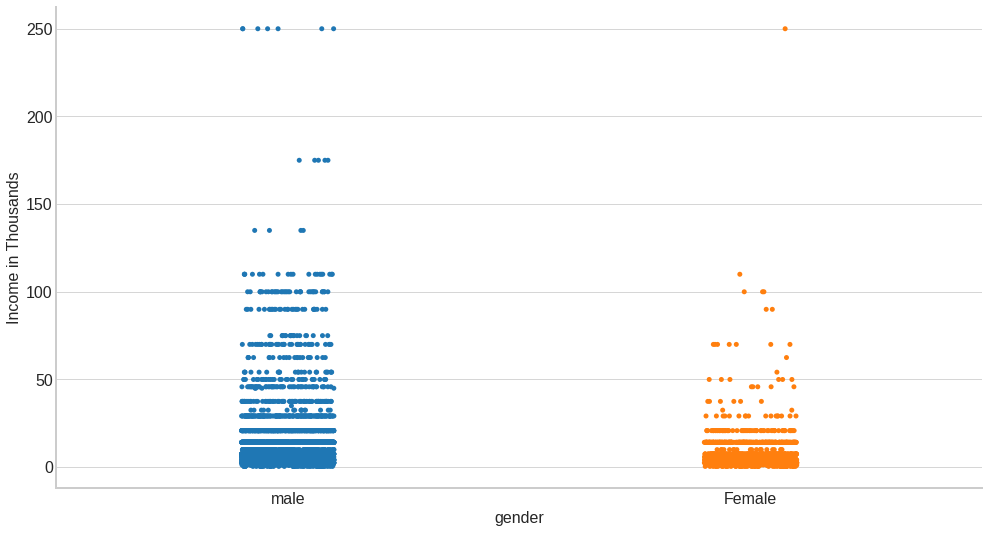

The average income of a male person is 13849.10
The average income of a female person is 8450.58
From above graphs we can see men have a higher income 


In [9]:
gender_data = pd.DataFrame({"gender" : df.gender, "Income in Thousands": df.income.values / 1000})
gender_data['gender'] = gender_data['gender'].map({0:'Female', 1:'male'})
male_income = df.income.values[df[df['gender']>0].index.tolist()]
female_income = df.income.values[df[df['gender']==0].index.tolist()]


sns.catplot(x="gender", y="Income in Thousands", data=gender_data)
plt.gcf().set_size_inches(16, 8)
plt.show()


print(f"The average income of a male person is {np.average(male_income):.2f}")
print(f"The average income of a female person is {np.average(female_income):.2f}")
print("From above graphs we can see men have a higher income ")


Is there a correlation between income and skin complexion?

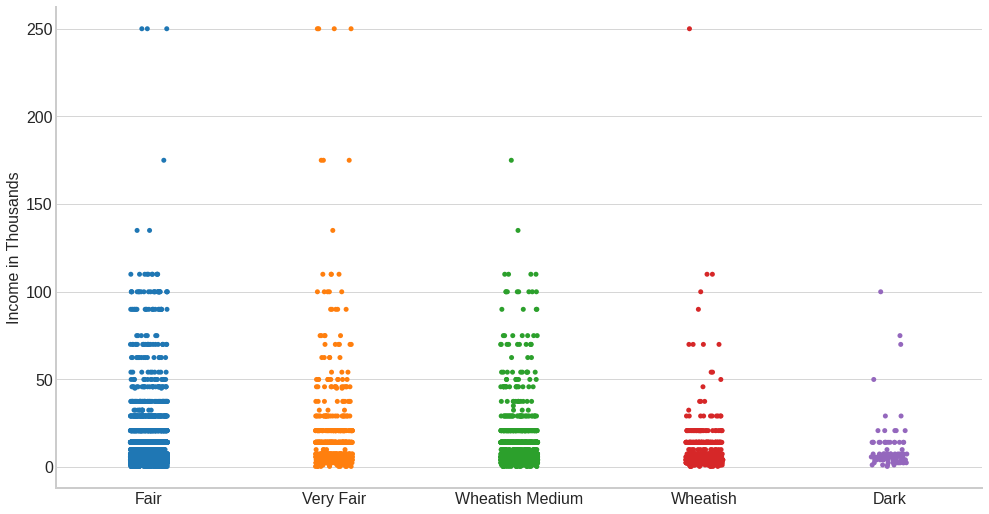

The average income of a person of Very Fair complexion is 18577.48
The average income of a person of Fair complexion is 12478.92
The average income of a person of Wheatish Medium complexion is 11757.69
The average income of a person of Wheatish complexion is 10414.40
The average income of a person of Dark complexion is 11463.33
The above graph indicated that there is a clear difference in income levels of people with 
fair and dark complexion.People with fairer complexion seem to have higher income


In [10]:
complexion_data = pd.DataFrame({"complexion" : df.complexion, "Income in Thousands": df.income.values / 1000})
complexion_data['complexion'] = complexion_data['complexion'].map({1: 'Very Fair',
                                                                   2: 'Fair',
                                                                   3: "Wheatish Medium",
                                                                   4: "Wheatish",
                                                                   5: "Dark"})


sns.catplot(x="complexion", y="Income in Thousands", data=complexion_data)
plt.gcf().set_size_inches(16, 8)
plt.xlabel('')
plt.show()


Very_Fair_income = df.income.values[df[df['complexion']==1].index.tolist()]
Fair_income = df.income.values[df[df['complexion']==2].index.tolist()]
Wheatish_Medium_income = df.income.values[df[df['complexion']==3].index.tolist()]
Wheatish_income = df.income.values[df[df['complexion']==4].index.tolist()]
Dark_income = df.income.values[df[df['complexion']==5].index.tolist()]


print(f"The average income of a person of Very Fair complexion is {np.average(Very_Fair_income):.2f}")
print(f"The average income of a person of Fair complexion is {np.average(Fair_income):.2f}")
print(f"The average income of a person of Wheatish Medium complexion is {np.average(Wheatish_Medium_income):.2f}")
print(f"The average income of a person of Wheatish complexion is {np.average(Wheatish_income):.2f}")
print(f"The average income of a person of Dark complexion is {np.average(Dark_income):.2f}")
print("The above graph indicated that there is a clear difference in income levels of people with \nfair and dark complexion.People with fairer complexion seem to have higher income")

Is there a discernable trend in the incomes of participants from different regions/cities?

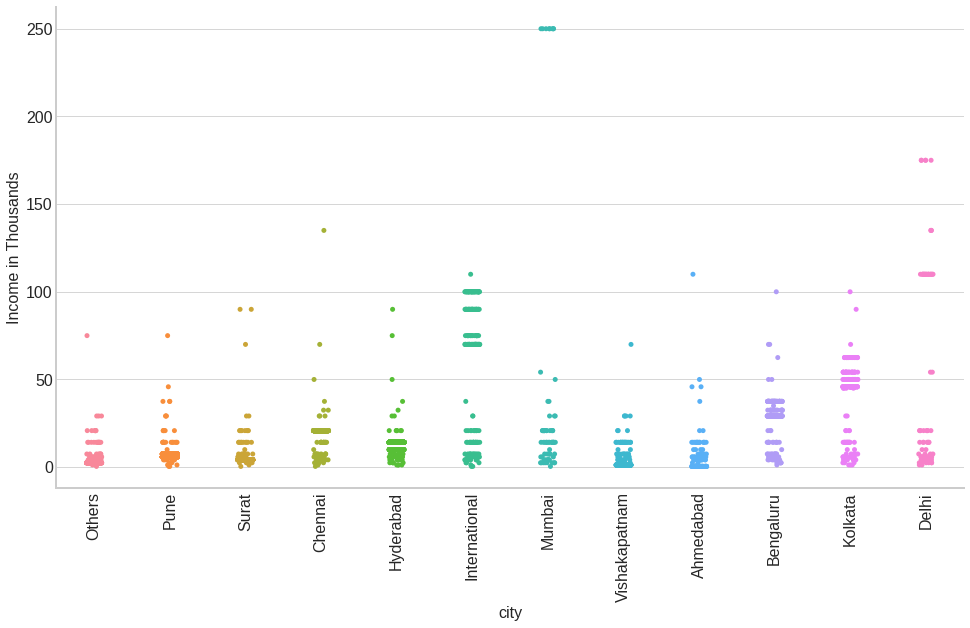

People from International region and well developed cities seem to have higher income 
than people from less developed regions


In [11]:

city_data = pd.DataFrame({"city" : df.city.values, "Income in Thousands": df.income.values / 1000})
city_data.sort_values('city')
city_data['city'] = city_data['city'].map({1: 'International',
                                           2: 'Mumbai',
                                           3: "Delhi",
                                           4: "Kolkata",
                                           5: "Bengaluru",
                                           6: "Chennai",
                                           7: "Hyderabad",
                                           8 : "Pune",
                                           9 : "Ahmedabad",
                                           10 : "Surat",
                                           11 : "Vishakapatnam",
                                           12 : "Others"})


sns.catplot(x="city", y="Income in Thousands", data=city_data)
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation='vertical')
plt.show()
print("People from International region and well developed cities seem to have higher income \nthan people from less developed regions")

Is there a clear trend between BMI and the income?

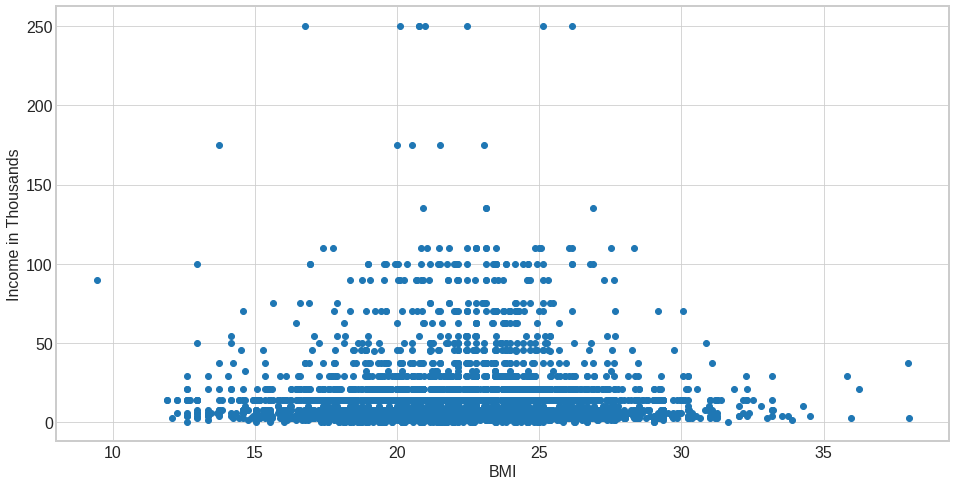

It seems that on average people with extreme bmi do not have as much income as people with average BMI.


In [12]:
bmi_data = pd.DataFrame({"bmi" : df.bmi, "Income in Thousands": df.income.values / 1000})


plt.scatter(df.bmi.values, df.income.values / 1000)
plt.gcf().set_size_inches(16, 8)
plt.xlabel("BMI")
plt.ylabel("Income in Thousands")
plt.show()

print("It seems that on average people with extreme bmi do not have as much income as people with average BMI.")


Does the level of education show a clear trend with income?

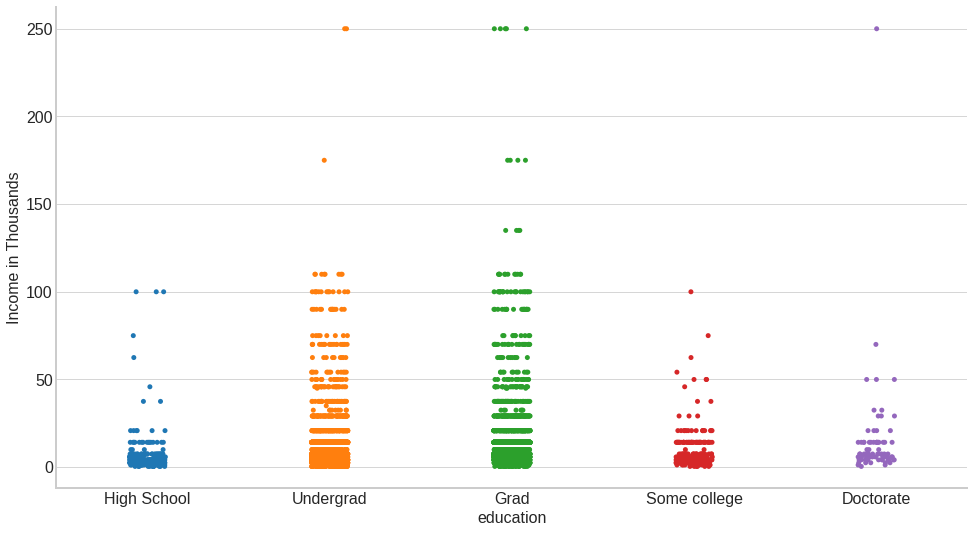

From above graphs we can see that the income level of people who only had education upto 
Grad or Undergrad levels have the highest incomes 
The average income of a person with education upto High School is 6434.28
The average income of a person with education upto Some College is 9456.37
The average income of a person with education upto Undergraduation is 11752.68
The average income of a person with education upto Graduation is 14485.97
The average income of a person with education upto Doctorate is 14850.88
The average income of a person increses with level of education.


In [13]:
education_data = pd.DataFrame({"education" : df.education, "Income in Thousands": df.income.values / 1000})
education_data.sort_values('education')
education_data['education'] = education_data['education'].map({0:'High School',
                                                               1:'Some college',
                                                               2:'Undergrad',
                                                               3:'Grad',
                                                               4:'Doctorate'})
#male_income = df.income.values[df[df['gender']>0].index.tolist()]
#female_income = df.income.values[df[df['gender']==0].index.tolist()]


sns.catplot(x="education", y="Income in Thousands", data=education_data)
plt.gcf().set_size_inches(16, 8)
plt.show()

print("From above graphs we can see that the income level of people who only had education upto \nGrad or Undergrad levels have the highest incomes ")


HighSchool_income = df.income.values[df[df['education']==0].index.tolist()]
College_income = df.income.values[df[df['education']==1].index.tolist()]
UnderGrad_income = df.income.values[df[df['education']==2].index.tolist()]
Grad_income = df.income.values[df[df['education']==3].index.tolist()]
Doc_income = df.income.values[df[df['education']==4].index.tolist()]


print(f"The average income of a person with education upto High School is {np.average(HighSchool_income):.2f}")
print(f"The average income of a person with education upto Some College is {np.average(College_income):.2f}")
print(f"The average income of a person with education upto Undergraduation is {np.average(UnderGrad_income):.2f}")
print(f"The average income of a person with education upto Graduation is {np.average(Grad_income):.2f}")
print(f"The average income of a person with education upto Doctorate is {np.average(Doc_income):.2f}")
print("The average income of a person increses with level of education.")


Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

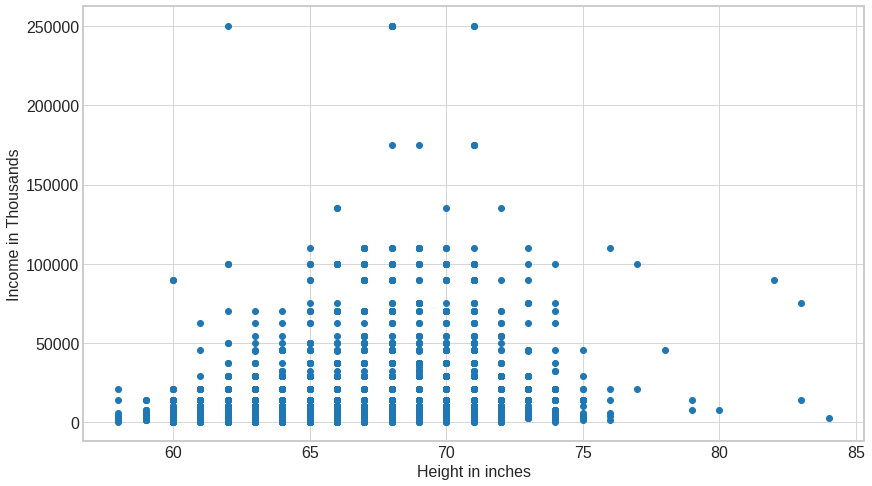

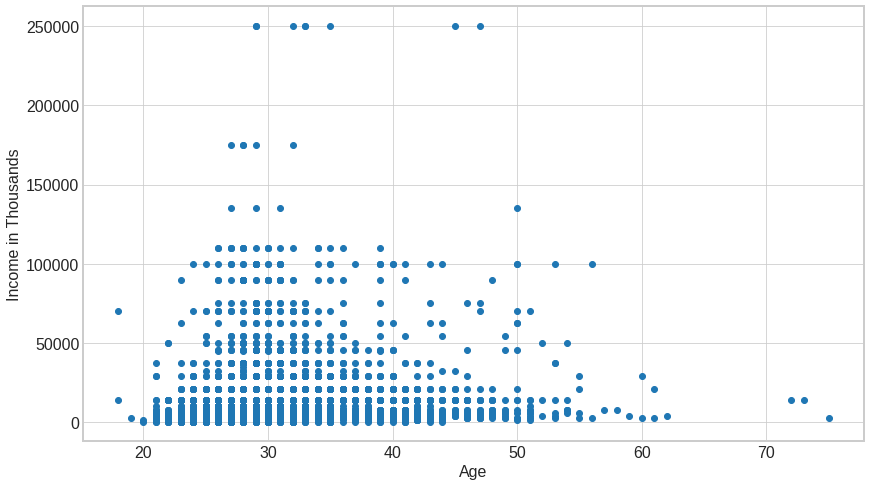

From these graphs we can see that income increses exponentially with age and height upto a certain value 
 and further increasing the predictor variable the response decreases


In [14]:
# height Dependency
plt.scatter(df.height, df.income)
plt.gcf().set_size_inches(14, 8)
plt.xlabel("Height in inches")
plt.ylabel("Income in Thousands")
plt.show()

# Age Dependency
plt.scatter(df.age, df.income)
plt.gcf().set_size_inches(14, 8)
plt.xlabel("Age")
plt.ylabel("Income in Thousands")
plt.show()

print("From these graphs we can see that income increses exponentially with age and height upto a certain value \n and further increasing the predictor variable the response decreases")



Is the income lower or high for those living in 'nuclear' families?

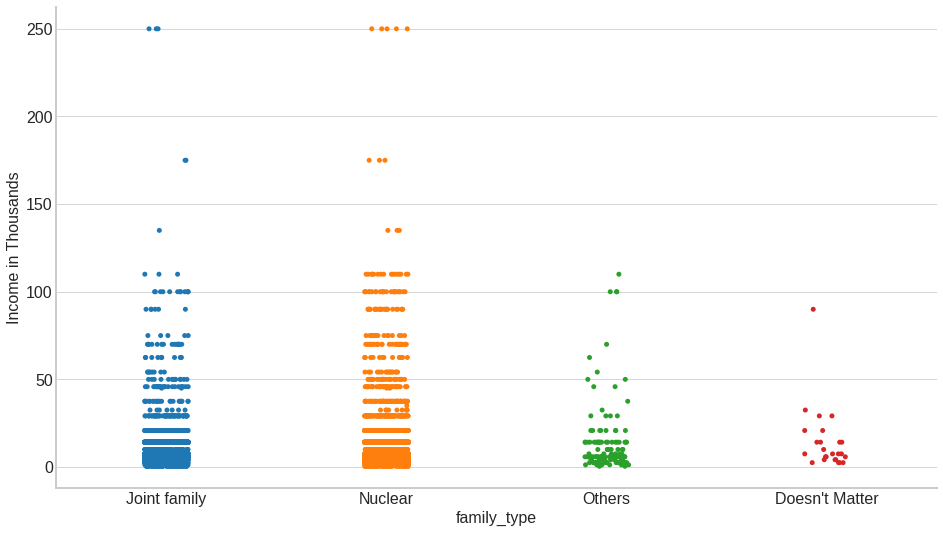

The average income of a person of Joint family is 11150.94
The average income of a person of Nuclear family is 9456.37
The average income of a person of other type of family is 14485.97
The average income of a person who's family does not matter is 6434.28
From above graph we can see that on average the income of a person of Joint family is 
higher than other types of families and we can also see that the people from nuclear families 
have more people at higher income levels.


In [15]:
family_data = pd.DataFrame({"family_type" : df.family_type, "Income in Thousands": df.income.values / 1000})
family_data.sort_values('family_type')
family_data['family_type'] = family_data['family_type'].map(  {0:"Doesn't Matter",
                                                               1:'Nuclear',
                                                               2:'Joint family',
                                                               3:'Others',})

sns.catplot(x="family_type", y="Income in Thousands", data=family_data)
plt.gcf().set_size_inches(16, 8)
plt.show()

joint_income = df.income.values[df[df['family_type']==2].index.tolist()]
nuclear_income = df.income.values[df[df['education']==1].index.tolist()]
Others_income = df.income.values[df[df['education']==3].index.tolist()]
no_matter_income = df.income.values[df[df['education']==0].index.tolist()]


print(f"The average income of a person of Joint family is {np.average(joint_income):.2f}")
print(f"The average income of a person of Nuclear family is {np.average(nuclear_income):.2f}")
print(f"The average income of a person of other type of family is {np.average(Others_income):.2f}")
print(f"The average income of a person who's family does not matter is {np.average(no_matter_income):.2f}")


print("From above graph we can see that on average the income of a person of Joint family is \nhigher than other types of families and we can also see that the people from nuclear families \nhave more people at higher income levels.")

Is being 'Manglik' negatively affect the income of participants?

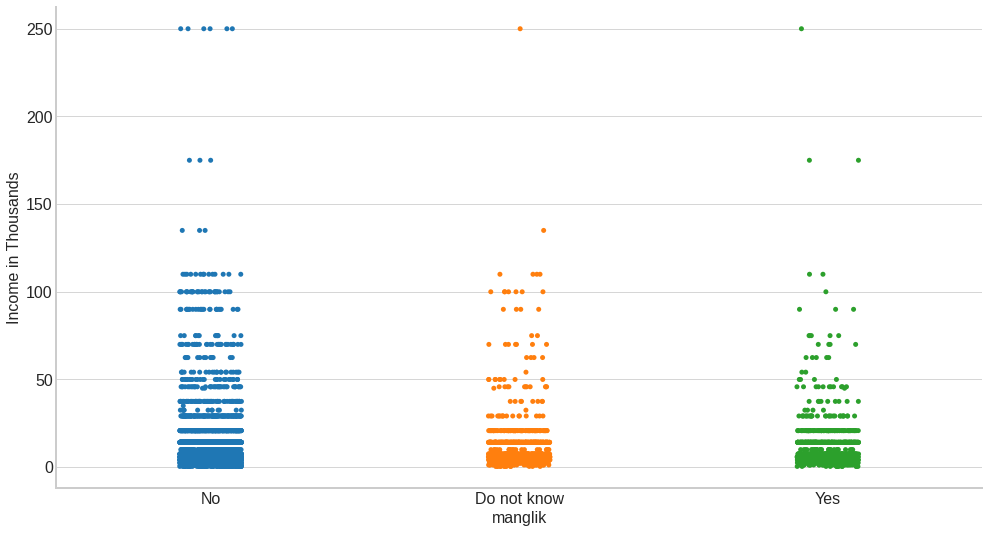

From above graph we can see that there are more people on a higher income level 
than non manglik. 
The average income of a manglik person is 12024.83
The average income of a non-manglik person is 12927.09
The average income of a person who does't know whether he is manglik or not is 12341.15


In [16]:
manglik_data = pd.DataFrame({"manglik" : df.manglik, "Income in Thousands": df.income.values / 1000})
manglik_data['manglik'] = manglik_data['manglik'].map({0:'No',
                                                               1:'Yes',
                                                               2:'Do not know'})


sns.catplot(x="manglik", y="Income in Thousands", data=manglik_data)
plt.gcf().set_size_inches(16, 8)
plt.show()

print("From above graph we can see that there are more people on a higher income level \nthan non manglik. ")


Manglik_income = df.income.values[df[df['manglik']==1].index.tolist()]
Not_manglik_income = df.income.values[df[df['manglik']==0].index.tolist()]
not_knowing_income = df.income.values[df[df['manglik']==2].index.tolist()]

print(f"The average income of a manglik person is {np.average(Manglik_income):.2f}")
print(f"The average income of a non-manglik person is {np.average(Not_manglik_income):.2f}")
print(f"The average income of a person who does't know whether he is manglik or not is {np.average(not_knowing_income):.2f}")


Let's Calculate the Gini Index

Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.

Comparing gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

In [17]:
# your code here
def gini_inex(x):
    x = np.sort(x)
    n = len(x)
    num = []
    for i in range(1, n+1):
        k = (2*i - n - 1)*x[i-1]
        num.append(k)
    num = np.sum(num)
    den = n * np.sum(x)

    G = num / den

    return G


income_set = df.income.values
gini = gini_inex(income_set)
print(f"The Gini Index of India based on given dataset is {gini:.4f}")

The Gini Index of India based on given dataset is 0.4944


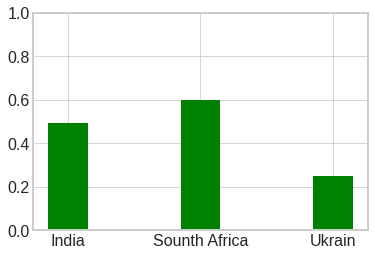

In [18]:
# your code here
gini_dict = {"India" : gini, "Sounth Africa" : 0.6 , "Ukrain" : 0.25}

plt.bar(gini_dict.keys(), gini_dict.values(),width=0.3, color='g')
plt.ylim(0,1)
plt.show()

As seen from above graph the Gini index of much higher than Ukrain and comparable to South Africa. Gini index ranges from 0 to 1, 0 indicating perfect income equality 1 indicating wealth concenration. As per our data India has high income inqualities compared to the countries like Ukrain.